<a href="https://colab.research.google.com/github/GoryachevDaniil/Tattelecom_test/blob/main/Tattelecom_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task

Задание:
Нужно будет проанализировать и обработать выгрузку удобным способом (в Excel, Python, SQL, т.д.), сделать выводы, найти ошибки

# Title

Графики:

1. Доли отключенных клиентов по регионам/городам.
2. Доли подключенных клиентов по регионам/городам.
3. Доли среднего/максимального обьема траффика по регионам/городам.
4. Доли клиентов по текущим статусам(круговая диаграмма)
5. Кол-во клиентов по имеющимся статусам.
6. Зависимости.

# Pre-processing

### Import libraries, read and describe data-file.

In [1]:
import pandas as pd
import numpy as np
import math

import datetime as dt
import calendar
from dateutil.relativedelta import relativedelta

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 50)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_excel('/content/gdrive/My Drive/Tattelecom_test/data.xlsx')

In [5]:
df.head()

,ИД КЛИЕНТА,РАЙОН,ГОРОД,ДАТА ЗАКЛЮЧЕНИЯ ДОГОВОРА,ТЕКУЩИЙ СТАТУС КЛИЕНТА,ОБЪЕМ ТРАФИКА,ПЕРИОД ТРАФИКА,ДАТА РАСТОРЖЕНИЯ ДОГОВОРА
0,1059697,г.Казань,г.Казань,2009-11-01,Активен,5.585631,2018-08-01,-
1,1059971,г.Казань,г.Казань,2009-11-01,Активен,5.477251,2018-08-01,-
2,1059773,г.Казань,г.Казань,2009-11-01,Активен,5.456529,2018-08-01,-
3,1059869,г.Казань,г.Казань,2009-11-01,Активен,5.292790,2018-08-01,-
4,1059521,г.Казань,г.Казань,2009-11-01,Активен,5.218273,2018-08-01,-


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320036 entries, 0 to 320035
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ИД КЛИЕНТА                 320036 non-null  int64         
 1   РАЙОН                      320036 non-null  object        
 2   ГОРОД                      320036 non-null  object        
 3   ДАТА ЗАКЛЮЧЕНИЯ ДОГОВОРА   320036 non-null  datetime64[ns]
 4   ТЕКУЩИЙ СТАТУС КЛИЕНТА     320036 non-null  object        
 5   ОБЪЕМ ТРАФИКА              320036 non-null  float64       
 6   ПЕРИОД ТРАФИКА             320036 non-null  datetime64[ns]
 7   ДАТА РАСТОРЖЕНИЯ ДОГОВОРА  320036 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 19.5+ MB


In [7]:
df.describe()

,ИД КЛИЕНТА,ОБЪЕМ ТРАФИКА
count,3.200360e+05,320036.000000
mean,1.166464e+06,39.465484
std,9.487750e+04,59.310169
min,1.000156e+06,0.000000
25%,1.086134e+06,2.917544
50%,1.166142e+06,20.658715
75%,1.248448e+06,53.341539
max,1.331136e+06,4987.645423


In [8]:
df.nunique()

ИД КЛИЕНТА                   320036
РАЙОН                            43
ГОРОД                           140
ДАТА ЗАКЛЮЧЕНИЯ ДОГОВОРА     290104
ТЕКУЩИЙ СТАТУС КЛИЕНТА            9
ОБЪЕМ ТРАФИКА                275364
ПЕРИОД ТРАФИКА                    1
ДАТА РАСТОРЖЕНИЯ ДОГОВОРА        27
dtype: int64

In [9]:
df.rename(columns = {'ИД КЛИЕНТА' : 'Client_ID', 'РАЙОН' : 'Region', 'ГОРОД' : 'City', 'ДАТА ЗАКЛЮЧЕНИЯ ДОГОВОРА' : 'Contract_start_date', \
                     'ТЕКУЩИЙ СТАТУС КЛИЕНТА' : 'Status', 'ОБЪЕМ ТРАФИКА' : 'Traffic_volume', 'ПЕРИОД ТРАФИКА' : 'Traffic_period', \
                     'ДАТА РАСТОРЖЕНИЯ ДОГОВОРА' : 'Contract_end_date'}, inplace = True)

In [10]:
df.loc[(df.Contract_end_date == '-'), 'Contract_end_date'] = np.nan

In [11]:
df

,Client_ID,Region,City,Contract_start_date,Status,Traffic_volume,Traffic_period,Contract_end_date
0,1059697,г.Казань,г.Казань,2009-11-01 00:00:00,Активен,5.585631,2018-08-01,NaN
1,1059971,г.Казань,г.Казань,2009-11-01 00:00:00,Активен,5.477251,2018-08-01,NaN
2,1059773,г.Казань,г.Казань,2009-11-01 00:00:00,Активен,5.456529,2018-08-01,NaN
3,1059869,г.Казань,г.Казань,2009-11-01 00:00:00,Активен,5.292790,2018-08-01,NaN
4,1059521,г.Казань,г.Казань,2009-11-01 00:00:00,Активен,5.218273,2018-08-01,NaN
...,...,...,...,...,...,...,...,...
320031,1280258,Мензелинский р-н,г.Мензелинск,2020-07-14 08:32:16,Активен,0.152954,2018-08-01,NaN
320032,1311400,Нижнекамский р-н,пгт.Камские Поляны,2020-07-14 08:36:16,Активен,0.000000,2018-08-01,NaN
320033,1009025,Актанышский р-н,с.Актаныш,2020-07-14 08:36:55,Активен,0.000000,2018-08-01,NaN
320034,1274738,Лениногорский р-н,г.Лениногорск,2020-07-14 09:03:10,Активен,0.159674,2018-08-01,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320036 entries, 0 to 320035
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Client_ID            320036 non-null  int64         
 1   Region               320036 non-null  object        
 2   City                 320036 non-null  object        
 3   Contract_start_date  320036 non-null  datetime64[ns]
 4   Status               320036 non-null  object        
 5   Traffic_volume       320036 non-null  float64       
 6   Traffic_period       320036 non-null  datetime64[ns]
 7   Contract_end_date    2382 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 19.5+ MB


### Add life period

In [13]:
df['Contract_end_date'] = pd.to_datetime(df['Contract_end_date'], format='%d.%m.%Y')

In [14]:
df['Life_period(days)'] = (df['Contract_end_date'] - (df['Contract_start_date'] - dt.timedelta(days=1))).dt.days

In [15]:
df['Life_period(days)'].fillna((dt.datetime(2020, 7, 15) - df['Contract_start_date']).dt.days, inplace=True)

In [16]:
df[df['Life_period(days)'].isna() != True].sample(10)

,Client_ID,Region,City,Contract_start_date,Status,Traffic_volume,Traffic_period,Contract_end_date,Life_period(days)
199825,1124245,г.Казань,г.Казань,2017-09-12 19:14:22,Активен,18.678359,2018-08-01,NaT,1036.0
109273,1226795,Елабужский р-н,г.Елабуга,2014-02-13 09:06:47,Блокирован+Приостановлен,0.000000,2018-08-01,NaT,2343.0
228401,1210399,г.Набережные Челны,г.Набережные Челны,2018-07-17 18:54:54,Блокирован+Приостановлен,0.000000,2018-08-01,NaT,728.0
51146,1181313,г.Набережные Челны,г.Набережные Челны,2012-05-30 10:10:32,Активен,72.774550,2018-08-01,NaT,2967.0
157725,1199737,г.Набережные Челны,г.Набережные Челны,2016-01-15 13:16:40,Активен,45.823495,2018-08-01,NaT,1642.0
55211,1078322,г.Казань,г.Казань,2012-07-31 10:39:51,Активен,251.949918,2018-08-01,NaT,2905.0
119376,1320993,Сармановский р-н,с.Сарманово,2014-06-24 18:00:37,Активен,8.284776,2018-08-01,NaT,2212.0
271651,1152453,г.Казань,г.Казань,2019-09-01 10:09:59,Активен,30.324145,2018-08-01,NaT,317.0
220054,1299386,Нижнекамский р-н,г.Нижнекамск,2018-04-10 13:30:39,Активен,65.798055,2018-08-01,NaT,826.0
115774,1017139,Альметьевский р-н,г.Альметьевск,2014-04-25 13:28:05,Активен,38.307029,2018-08-01,NaT,2272.0


2020-07-14 09:03:46 -  крайняя дата в датасете

### Check traffic without active contract

In [17]:
df['check_traffic'] = ((df['Contract_start_date'] - dt.timedelta(days=1) > df['Traffic_period']) & (df['Traffic_volume'] != 0))

In [18]:
df = df[df['check_traffic'] == False].copy()

In [19]:
df.drop('check_traffic' , axis=1, inplace=True)

In [20]:
df.shape

(242257, 9)

### Contrat's status validation

In [21]:
df[(df['Status'] == 'Закрыт') & (df['Contract_end_date'].isna() == True)].count()

Client_ID              0
Region                 0
City                   0
Contract_start_date    0
Status                 0
Traffic_volume         0
Traffic_period         0
Contract_end_date      0
Life_period(days)      0
dtype: int64

In [22]:
df[(df['Status'] != 'Закрыт') & (df['Contract_end_date'].isna() == False)].count()

Client_ID              0
Region                 0
City                   0
Contract_start_date    0
Status                 0
Traffic_volume         0
Traffic_period         0
Contract_end_date      0
Life_period(days)      0
dtype: int64

### Region and city validation

In [23]:
df.groupby(['Region']).City.nunique().sum()

140

In [24]:
df.nunique()

Client_ID              242257
Region                     43
City                      139
Contract_start_date    213786
Status                      9
Traffic_volume         197622
Traffic_period              1
Contract_end_date          26
Life_period(days)        3903
dtype: int64

In [25]:
cities = df.groupby(['Region', 'City'], as_index=False).Client_ID.count()

In [26]:
cities['City'].value_counts()

с.Александровка       2
г.Агрыз               1
с.Муслюмово           1
г.Менделеевск         1
с.Ижевка              1
                     ..
с.Черки-Ишмяково      1
с.Старый Студенец     1
с.Кият                1
с.Альшеево            1
г.Набережные Челны    1
Name: City, Length: 139, dtype: int64

In [27]:
cities[cities['City'] == 'с.Александровка']

,Region,City,Client_ID
23,Бавлинский р-н,с.Александровка,32
118,Сармановский р-н,с.Александровка,1


### Add traffic periol delta

In [28]:
df.loc[df['Contract_start_date'] < df['Traffic_period'], 'Traffic_period_start'] = df['Traffic_period']

In [29]:
df.loc[df['Contract_start_date'] >= df['Traffic_period'], 'Traffic_period_start'] = df['Contract_start_date']

In [30]:
df.loc[(df['Contract_end_date'] >= dt.datetime(2018, 9, 1)) | (df['Contract_end_date'].isna() == True), 'Traffic_period_end'] = dt.datetime(2018, 9, 1)

In [31]:
df.loc[(df['Contract_end_date'] < dt.datetime(2018, 9, 1)) & (df['Contract_end_date'].isna() == True), 'Traffic_period_end'] = df['Contract_end_date']

In [32]:
df['Traffic_period_delta'] = (df['Traffic_period_end'] - df['Traffic_period_start'])

In [33]:
df.loc[df['Traffic_period_delta'] < dt.timedelta(0), 'Traffic_period_delta'] = dt.timedelta(0)

In [ ]:
df['Traffic_period_delta(sec)'] = df['Traffic_period_delta'].astype(int)

# Graphics

### 1. Доли отключенных клиентов по регионам/городам.

In [35]:
df2 = df[df['Status'] != "Активен"]

In [36]:
df_draw = df2.groupby('Region', as_index=False).Status.count()

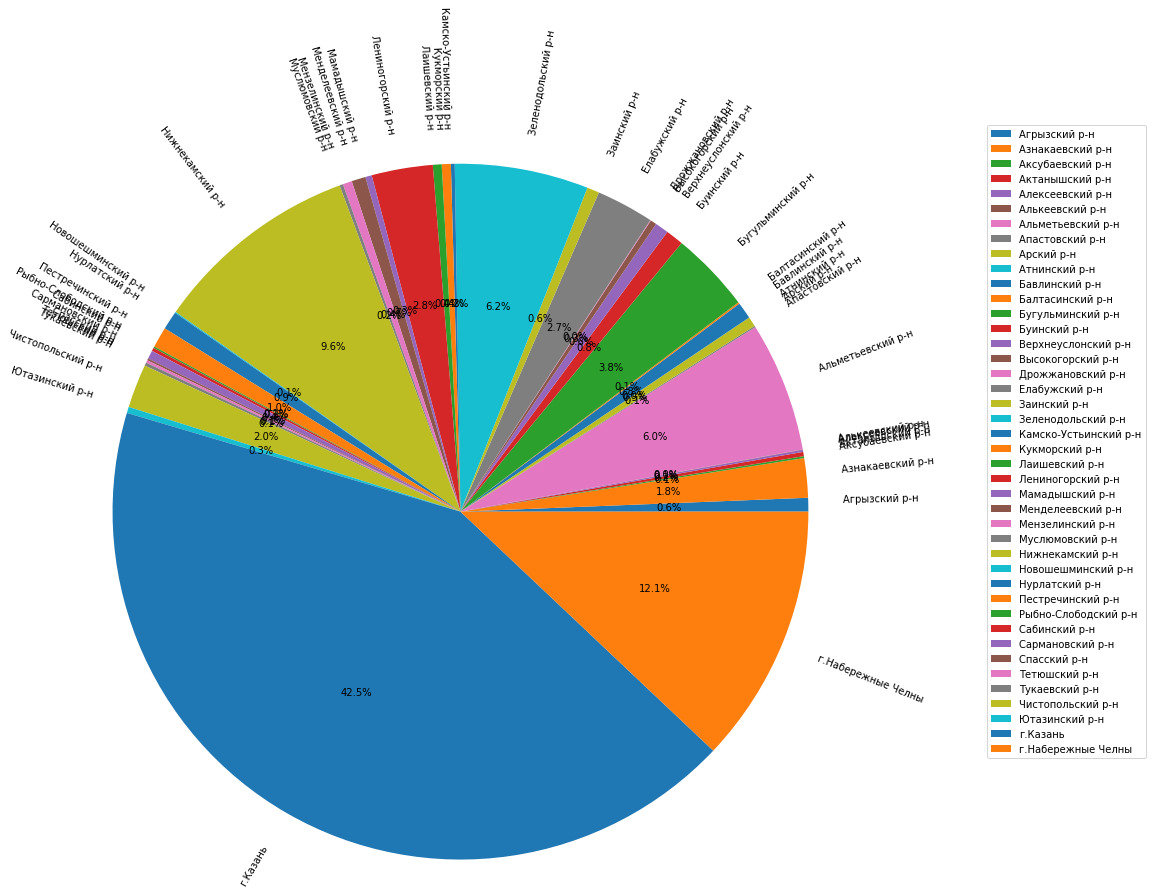

In [37]:
fig1, ax1 = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax1.pie(df_draw['Status'], \
                                   labels=df_draw['Region'], \
                                   autopct='%1.1f%%', \
                                  #  labeldistance=None, \
                                   rotatelabels=True, \
                                   radius=2)
ax1.legend(loc='upper left', bbox_to_anchor=(1.7, 1.4))

plt.show()

In [38]:
df2 = df[df['Status'] != "Активен"]

In [39]:
df_draw = df2.groupby('City', as_index=False).Status.count()

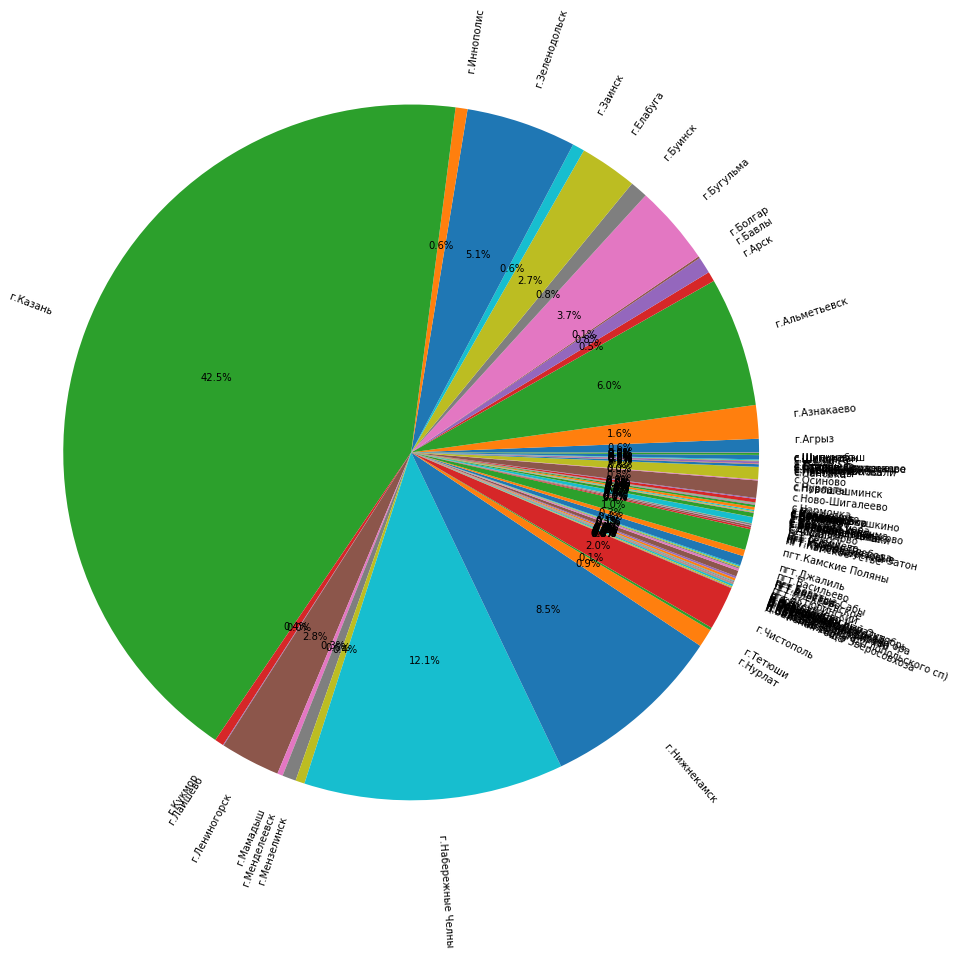

In [40]:
fig1, ax1 = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax1.pie(df_draw['Status'], \
                                   labels=df_draw['City'], \
                                   autopct='%1.1f%%', \
                                  #  labeldistance=None, \
                                   rotatelabels=True, \
                                   radius=2)
# ax1.legend(loc='upper left', bbox_to_anchor=(1.5, 1.25))

plt.show()

### 2. Доли подключенных клиентов по регионам/городам.

In [41]:
df2 = df[df['Status'] == "Активен"]

In [42]:
df_draw = df2.groupby('Region', as_index=False).Status.count()

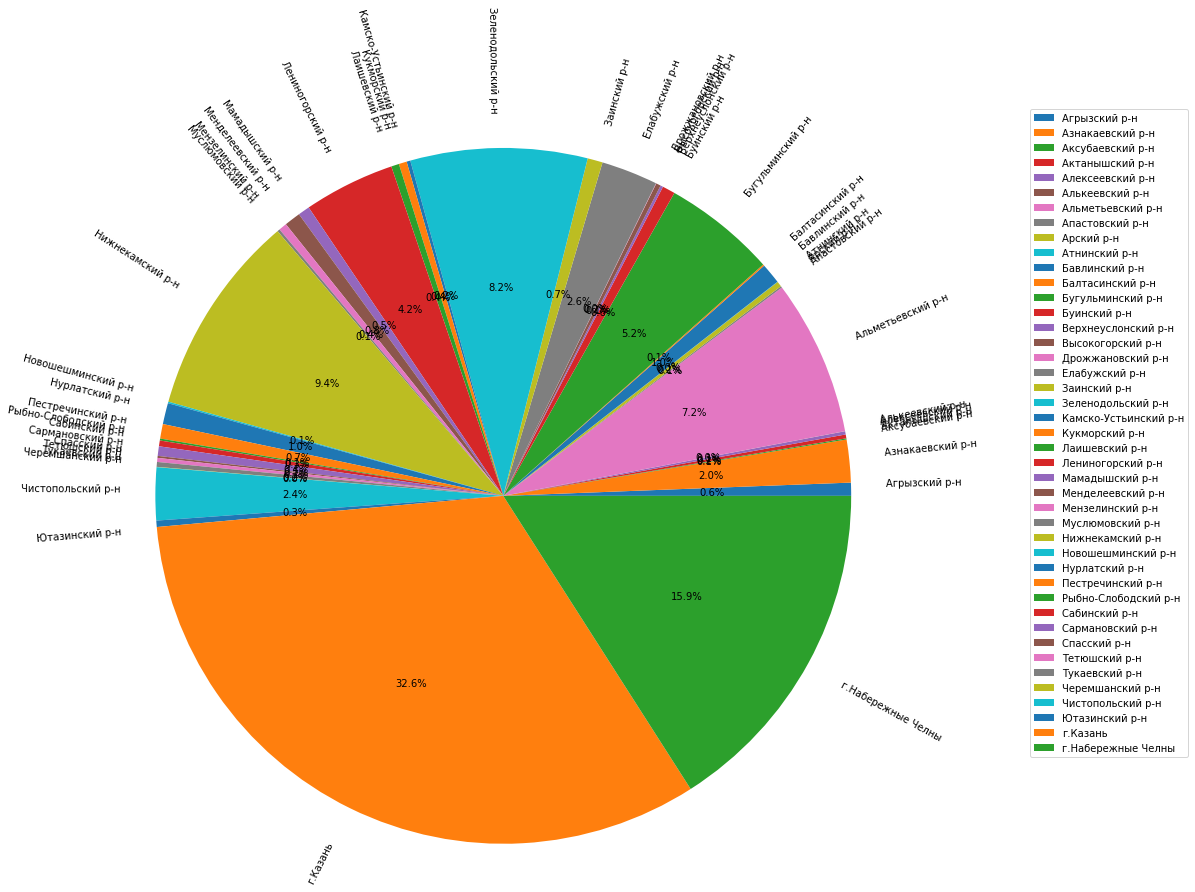

In [43]:
fig1, ax1 = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax1.pie(df_draw['Status'], \
                                   labels=df_draw['Region'], \
                                   autopct='%1.1f%%', \
                                  #  labeldistance=None, \
                                   rotatelabels=True, \
                                   radius=2)
ax1.legend(loc='upper left', bbox_to_anchor=(1.7, 1.4))

plt.show()

In [44]:
df2 = df[df['Status'] == "Активен"]

In [45]:
df_draw = df2.groupby('City', as_index=False).Status.count()

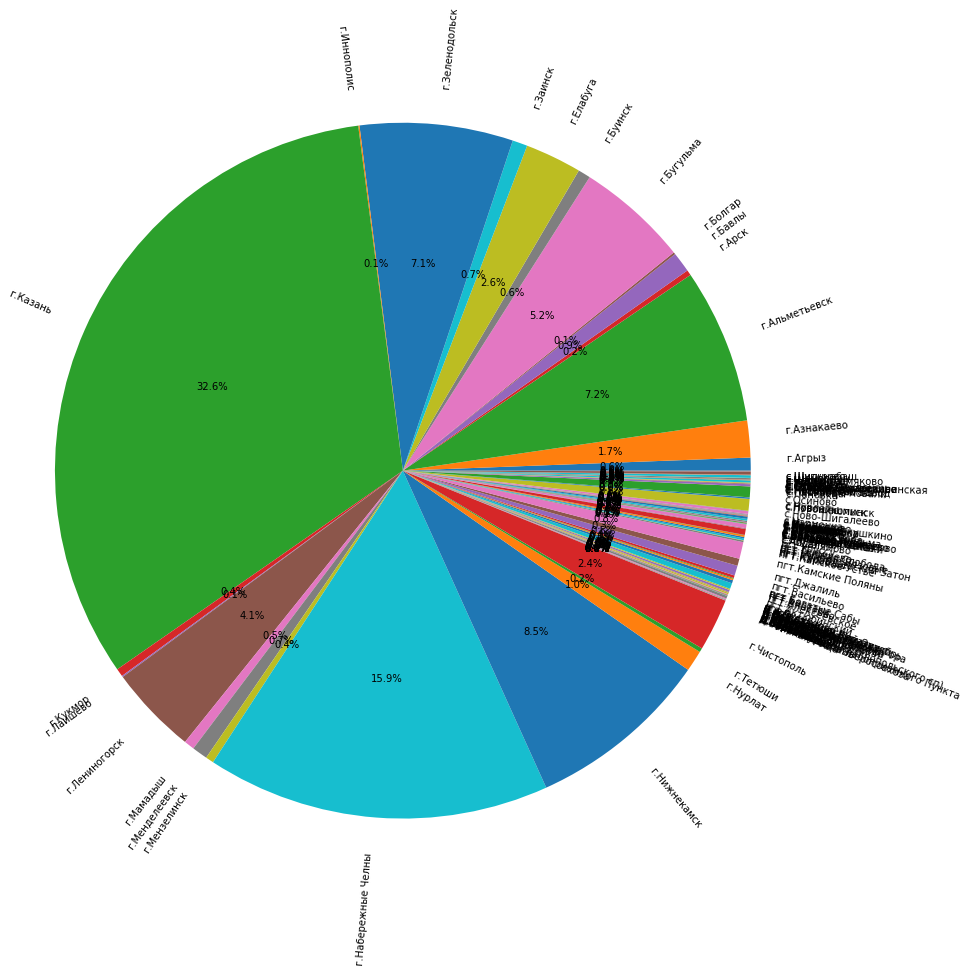

In [46]:
fig1, ax1 = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax1.pie(df_draw['Status'], \
                                   labels=df_draw['City'], \
                                   autopct='%1.1f%%', \
                                  #  labeldistance=None, \
                                   rotatelabels=True, \
                                   radius=2)
# ax1.legend(loc='upper left', bbox_to_anchor=(1.5, 1.25))

plt.show()

### 3. Доли среднего/максимального обьема траффика по регионам/городам.

Клиент с маскимальным обьемом траффика

In [47]:
df.loc[df['Traffic_volume'] == df['Traffic_volume'].max()]

,Client_ID,Region,City,Contract_start_date,Status,Traffic_volume,Traffic_period,Contract_end_date,Life_period(days),Traffic_period_start,Traffic_period_end,Traffic_period_delta,Traffic_period_delta(sec)
136902,1291142,Нижнекамский р-н,г.Нижнекамск,2015-02-20 17:09:21,Активен,3590.017006,2018-08-01,NaT,1971.0,2018-08-01,2018-09-01,31 days,2678400000000000


Средний обьем траффика по регионам

In [48]:
df.groupby('Region', as_index=False).Traffic_volume.mean() \
                                    .rename(columns = {'Traffic_volume' : 'Mean_traffic'}) \
                                    .sort_values(by='Mean_traffic', ascending=False) \
                                    .head(10)

,Region,Mean_traffic
23,Лениногорский р-н,47.557947
30,Нурлатский р-н,43.580775
12,Бугульминский р-н,43.004564
6,Альметьевский р-н,42.824240
10,Бавлинский р-н,40.405526
40,Ютазинский р-н,39.943345
34,Сармановский р-н,39.881833
1,Азнакаевский р-н,39.189713
19,Зеленодольский р-н,38.549141
28,Нижнекамский р-н,37.872582


In [49]:
df2 = df[df['Traffic_volume'] != 0]

In [50]:
df_draw = df2.groupby('Region', as_index=False).Traffic_volume.mean()

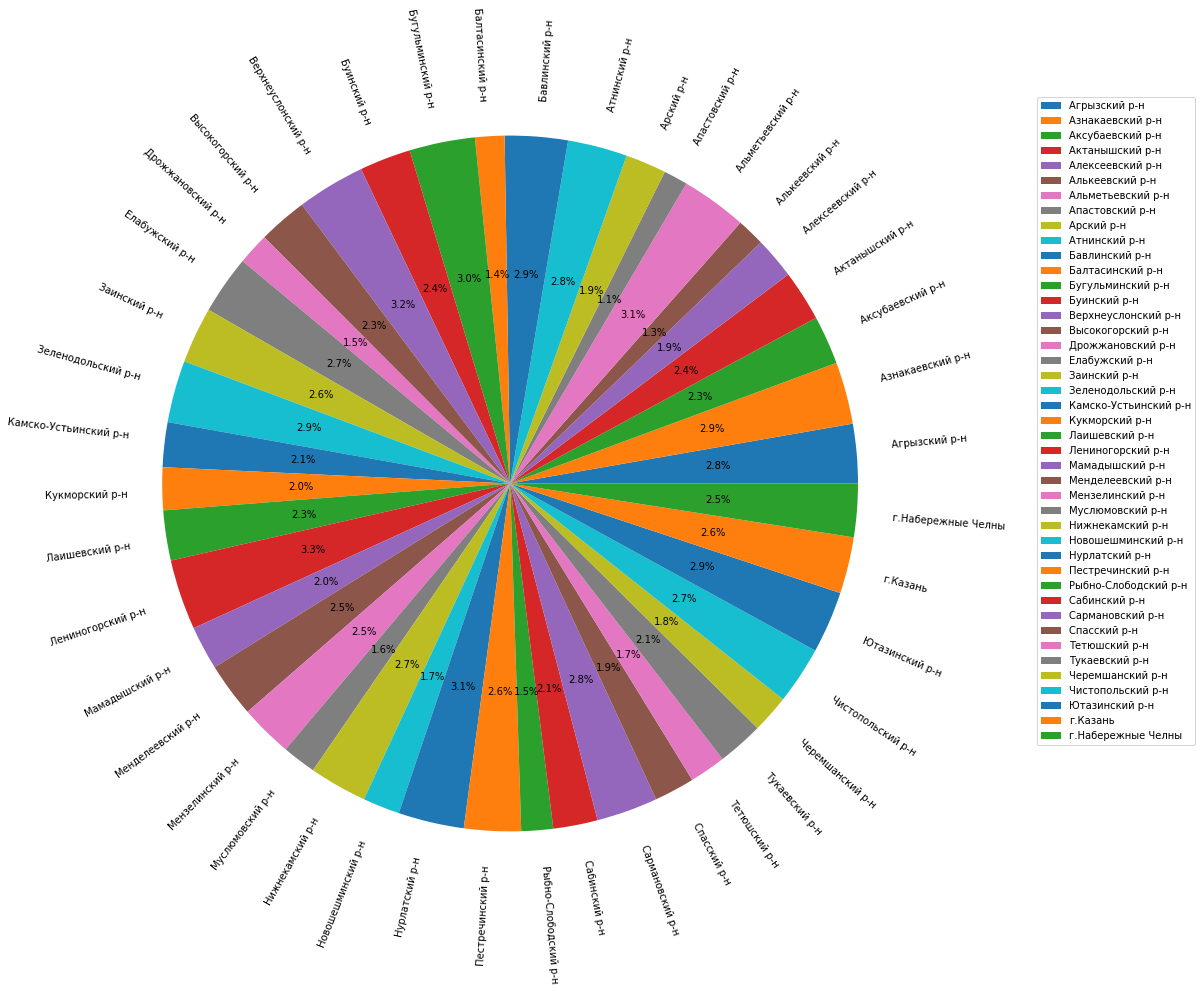

In [51]:
fig1, ax1 = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax1.pie(df_draw['Traffic_volume'], \
                                   labels=df_draw['Region'], \
                                   autopct='%1.1f%%', \
                                  #  labeldistance=None, \
                                   rotatelabels=True, \
                                   radius=2)
ax1.legend(loc='upper left', bbox_to_anchor=(1.7, 1.4))

plt.show()

Средний обьем траффика по городам

In [52]:
df.groupby('City', as_index=False).Traffic_volume.mean() \
                                  .rename(columns = {'Traffic_volume' : 'Mean_traffic'}) \
                                  .sort_values(by='Mean_traffic', ascending=False) \
                                  .head(10)

,City,Mean_traffic
42,п.Новочершилинский,86.458924
54,п.ж/д разъезда Лащи,64.656965
31,п.Березовка,58.569942
129,с.Тихоново,54.656402
126,с.Столбище,53.643433
35,п.Каратунского Хлебоприемного Пункта,49.839490
133,с.Черки-Ишмяково,48.087800
15,г.Лениногорск,47.960100
60,пгт.Актюбинский,46.643783
53,п.ж/д разъезда Куркачи,45.508142


In [53]:
df2 = df[df['Traffic_volume'] != 0]

In [54]:
df_draw = df2.groupby('City', as_index=False).Traffic_volume.mean()

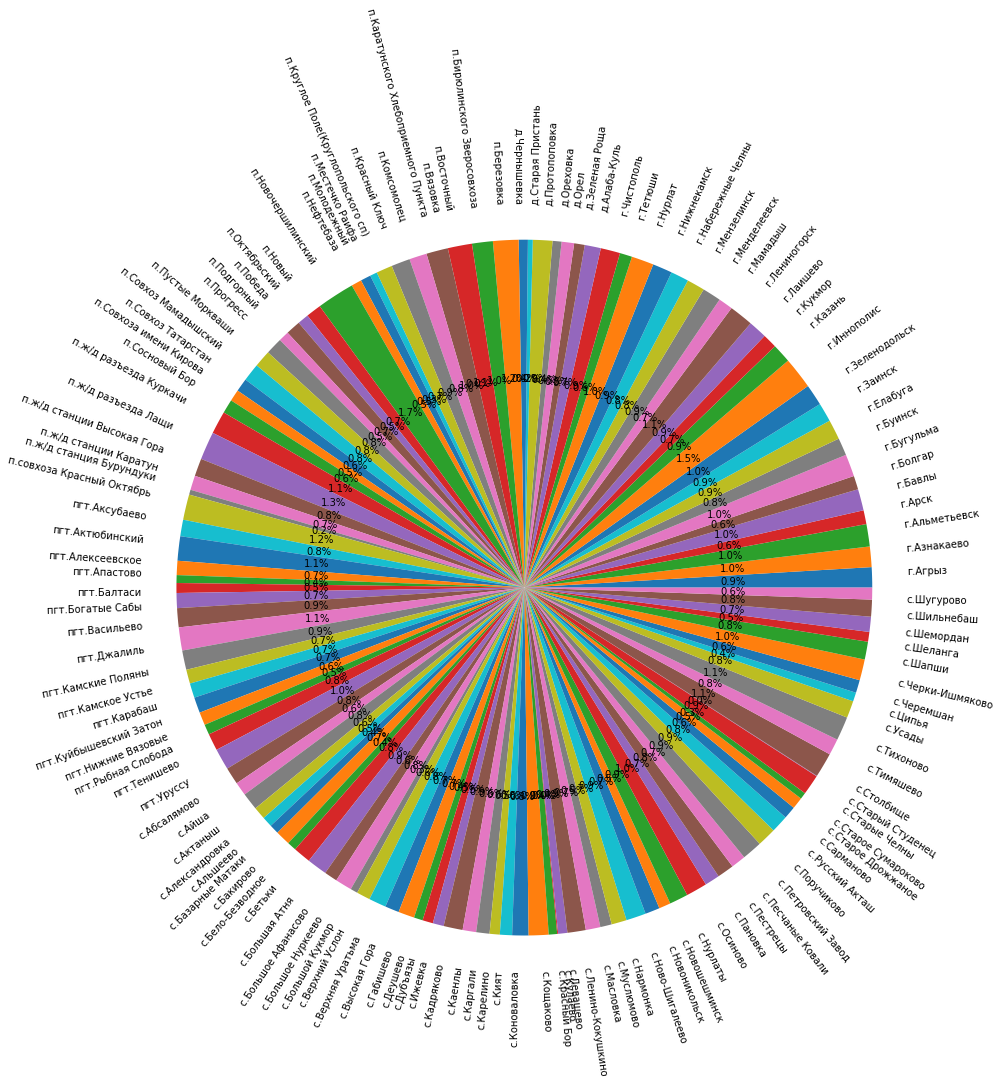

In [55]:
fig1, ax1 = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax1.pie(df_draw['Traffic_volume'], \
                                   labels=df_draw['City'], \
                                   autopct='%1.1f%%', \
                                  #  labeldistance=None, \
                                   rotatelabels=True, \
                                   radius=2)
# ax1.legend(loc='upper left', bbox_to_anchor=(1.7, 1.4))
plt.show()

Максимальный обьем трафика по регионам

In [56]:
df.groupby('Region', as_index=False).Traffic_volume.max() \
                                    .rename(columns = {'Traffic_volume' : 'Max_traffic'}) \
                                    .sort_values(by='Max_traffic', ascending=False) \
                                    .head(10)

,Region,Max_traffic
28,Нижнекамский р-н,3590.017006
12,Бугульминский р-н,2150.949414
41,г.Казань,1974.746194
23,Лениногорский р-н,1881.755254
31,Пестречинский р-н,1513.624940
19,Зеленодольский р-н,1213.506385
0,Агрызский р-н,1165.753532
42,г.Набережные Челны,1125.419719
6,Альметьевский р-н,941.926905
3,Актанышский р-н,920.081809


In [57]:
df2 = df[df['Traffic_volume'] != 0]

In [58]:
df_draw = df2.groupby('Region', as_index=False).Traffic_volume.max()

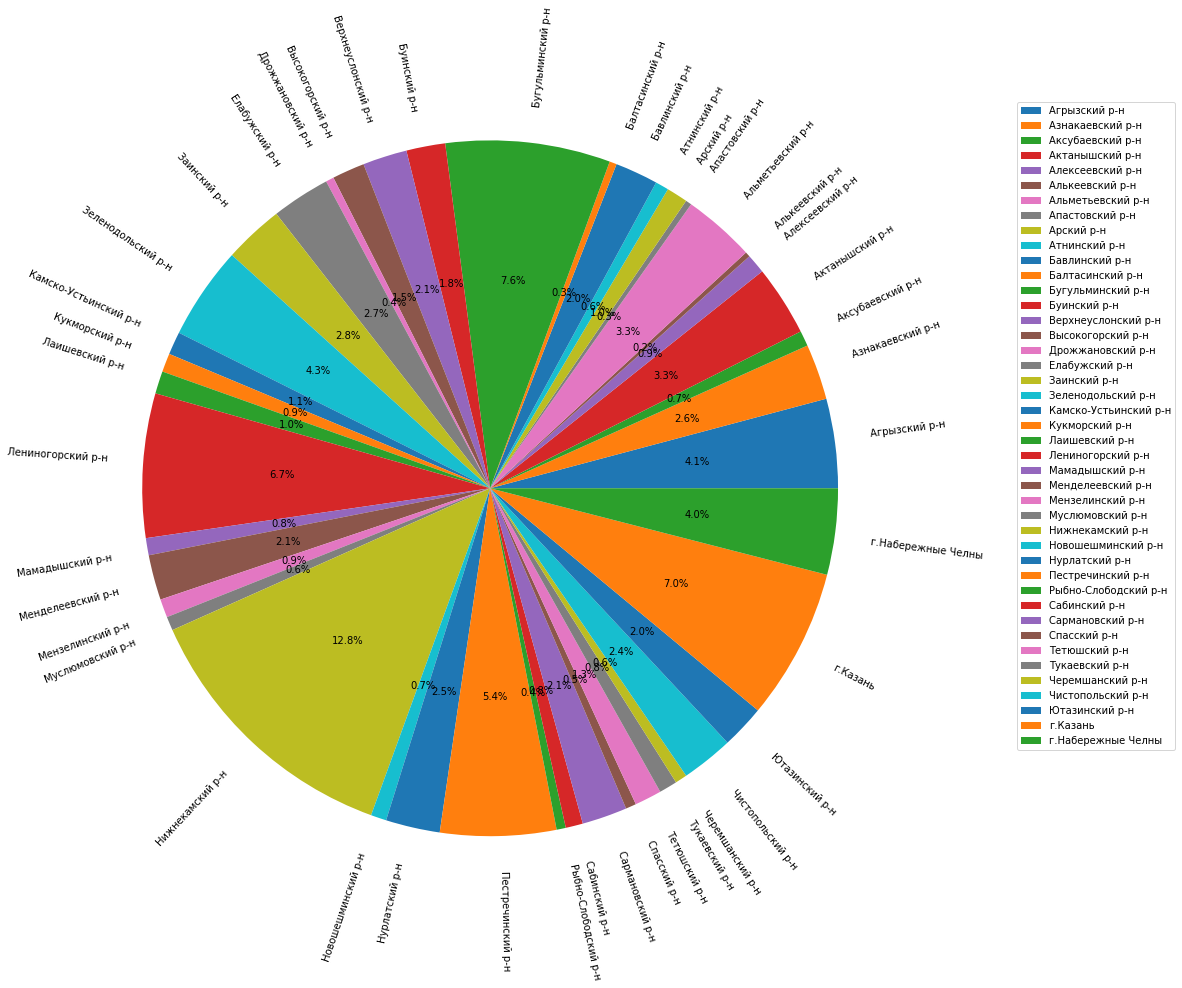

In [59]:
fig1, ax1 = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax1.pie(df_draw['Traffic_volume'], \
                                   labels=df_draw['Region'], \
                                   autopct='%1.1f%%', \
                                  #  labeldistance=None, \
                                   rotatelabels=True, \
                                   radius=2)
ax1.legend(loc='upper left', bbox_to_anchor=(1.7, 1.4))

plt.show()

Максимальный обьем трафика по городам


In [60]:
df.groupby('City', as_index=False).Traffic_volume.max() \
                                  .rename(columns = {'Traffic_volume' : 'Max_traffic'}) \
                                  .sort_values(by='Max_traffic', ascending=False) \
                                  .head(10)

,City,Max_traffic
20,г.Нижнекамск,3590.017006
6,г.Бугульма,2150.949414
12,г.Казань,1974.746194
15,г.Лениногорск,1881.755254
109,с.Ново-Шигалеево,1513.624940
10,г.Зеленодольск,1213.506385
0,г.Агрыз,1165.753532
19,г.Набережные Челны,1125.419719
2,г.Альметьевск,941.926905
77,с.Актаныш,920.081809


In [61]:
df2 = df[df['Traffic_volume'] != 0]

In [62]:
df_draw = df2.groupby('City', as_index=False).Traffic_volume.max()

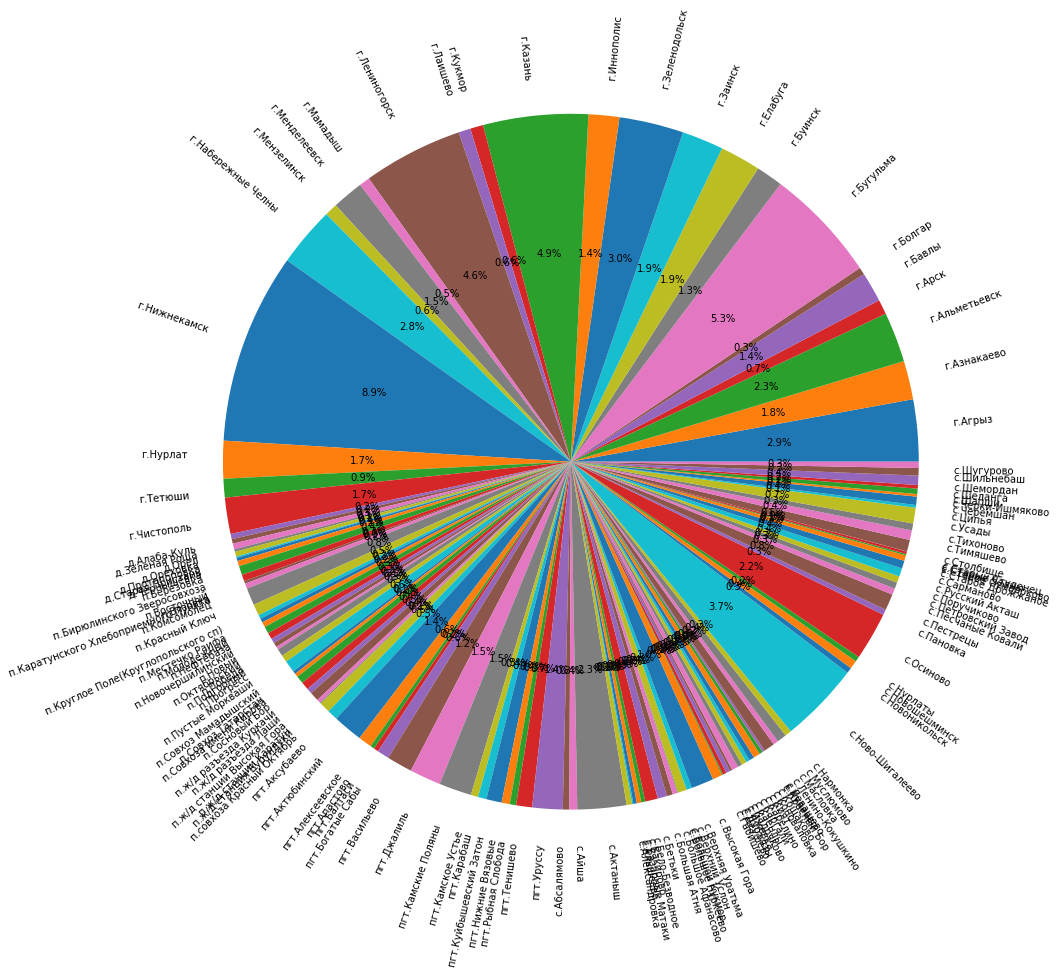

In [63]:
fig1, ax1 = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax1.pie(df_draw['Traffic_volume'], \
                                   labels=df_draw['City'], \
                                   autopct='%1.1f%%', \
                                  #  labeldistance=None, \
                                   rotatelabels=True, \
                                   radius=2)
# ax1.legend(loc='upper left', bbox_to_anchor=(1.7, 1.4))

plt.show()

### 4. Доли клиентов по текущим статусам(круговая диаграмма)

In [64]:
df_draw = df.groupby(['Status'], as_index=False).Client_ID.count()

In [65]:
total = df_draw['Client_ID'].sum()
df_draw['pct'] = (df_draw['Client_ID'] * 100) / total 

In [66]:
df_draw = df_draw[df_draw['pct'] > 0.05]

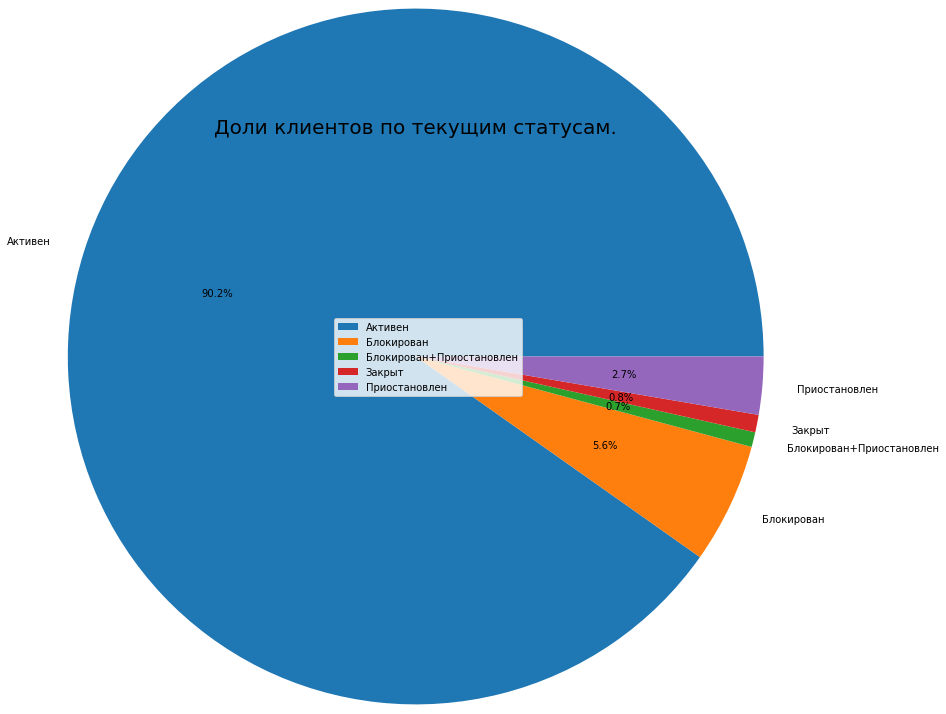

In [67]:
fig1, ax1 = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax1.pie(df_draw['Client_ID'], \
                                   labels=df_draw['Status'], \
                                   autopct='%1.1f%%', \
                                  #  labeldistance=None, \
                                   radius=2)
ax1.set_title("Доли клиентов по текущим статусам.", fontdict={'fontsize':20, 'fontweight':20})
ax1.legend(loc='upper left', bbox_to_anchor=(0.3, 0.6))
plt.show()

5. Cреднее время жизни клиента (в разбивке по городу в том числе) исходя из даты заключения и расторжения договора.

In [68]:
df_draw = df.groupby('City', as_index=False)['Life_period(days)'].mean()

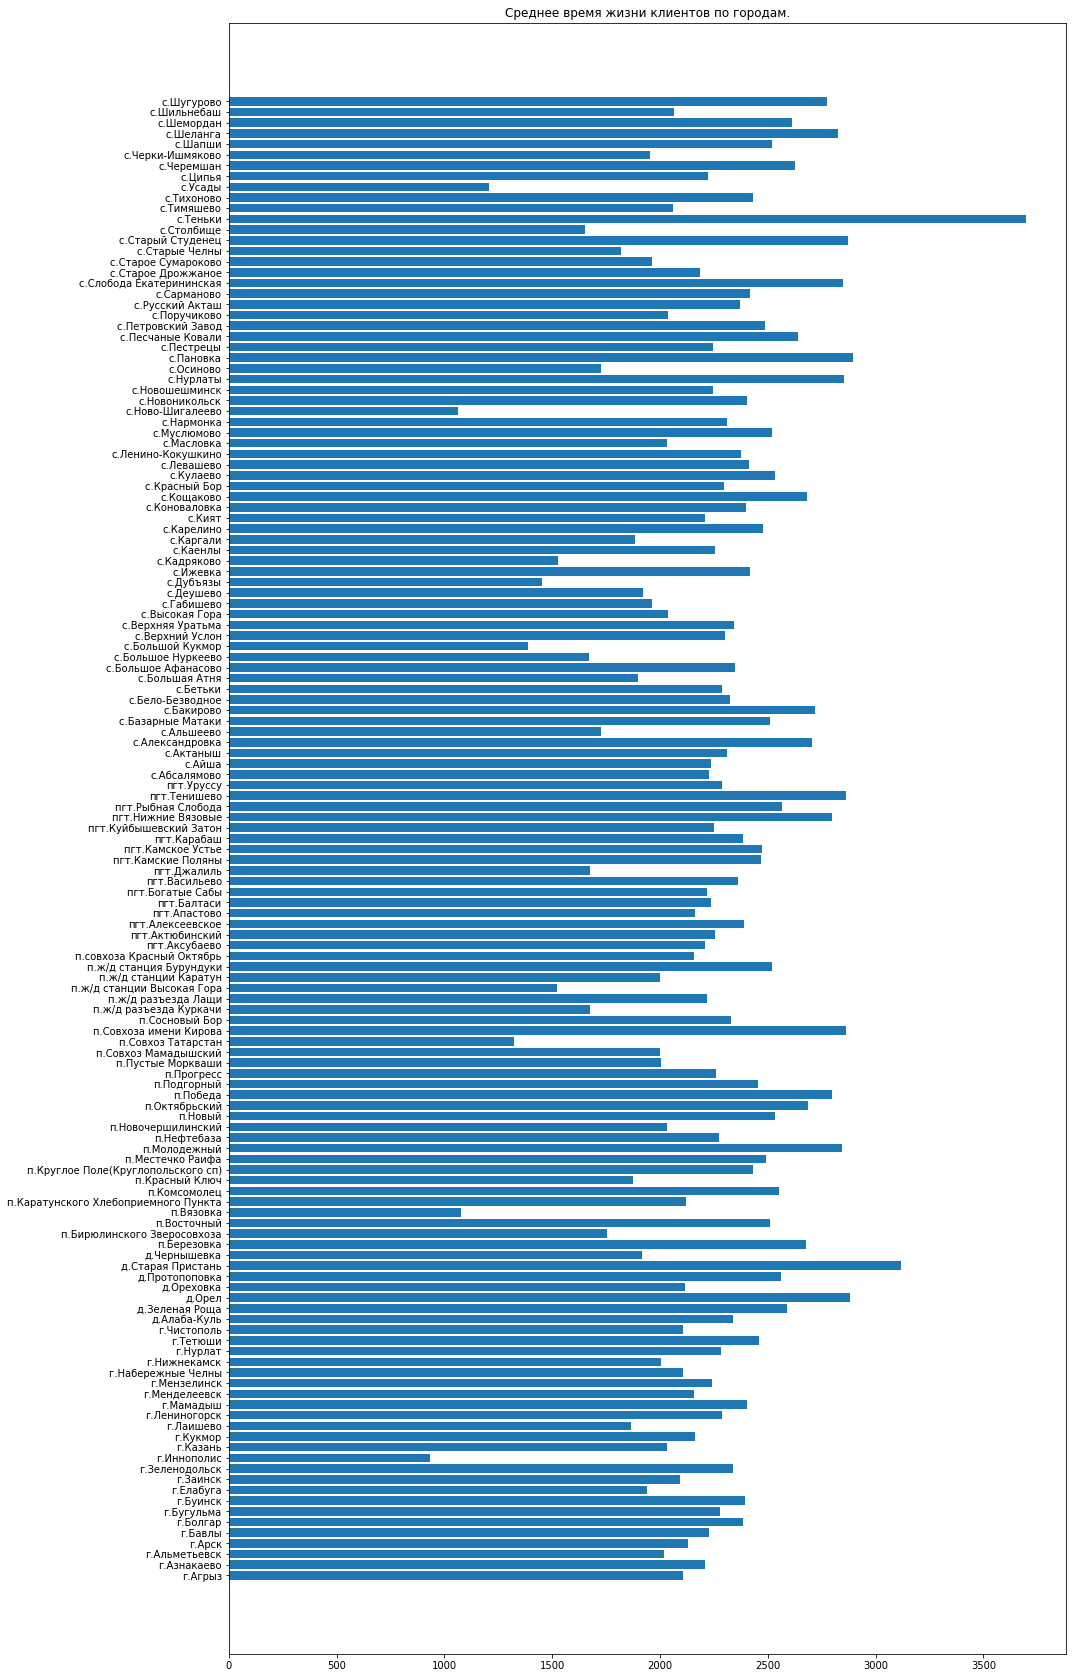

In [69]:
fig, ax = plt.subplots()

fig.set_figwidth(15) 
fig.set_figheight(30)

ax.set_title('Cреднее время жизни клиентов по городам.')

plt.barh(df_draw['City'], df_draw['Life_period(days)'])

plt.show()

### 5. Кол-во клиентов по имеющимся статусам.

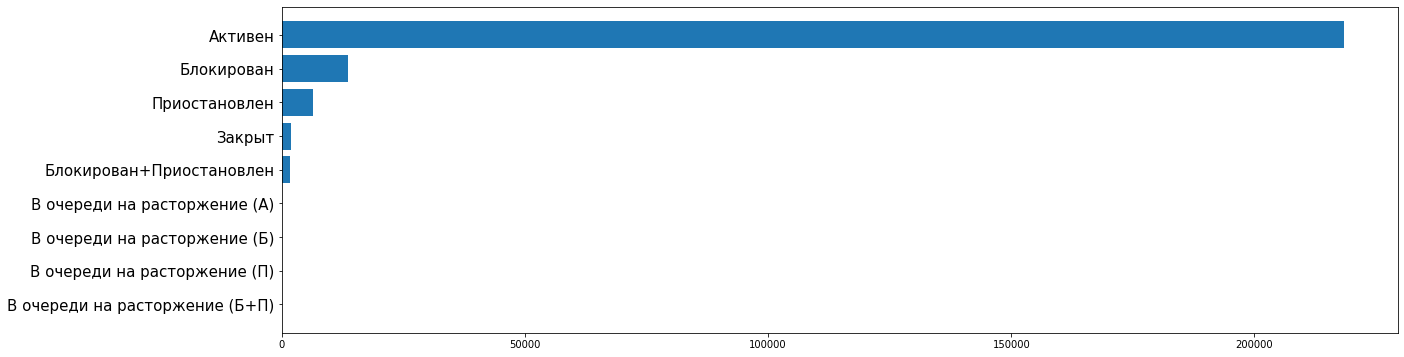

In [70]:
df_draw = df.groupby(['Status'], as_index=False).Client_ID.count()
df_draw = df_draw.sort_values(by='Client_ID')

value = df_draw['Client_ID']
position = np.arange(9)

fig, ax = plt.subplots(figsize=(20, 6))

ax.barh(position, value)
ax.set_yticks(position)

ax.set_yticklabels(df_draw['Status'],
                   fontsize = 15)

plt.show()

### 6. Зависимости

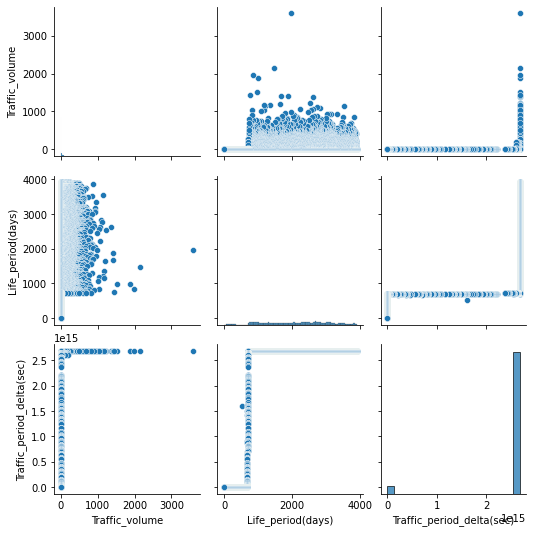

In [71]:
sns.pairplot(
    df,
    x_vars=["Traffic_volume", "Life_period(days)", "Traffic_period_delta(sec)"],
    y_vars=["Traffic_volume", "Life_period(days)", "Traffic_period_delta(sec)"],
)